# Extrahieren der Metadaten aus den Dateinamen

In [ ]:
#  🚀 Install libraries 
! pip install pandas

In [1]:
# load libraries 
from pathlib import Path
import re
import pandas as pd

## Informationen aus Dateinamen erxtrahieren
Mit Hilfe von Regularly Expressions (RegEx) werden folgende Informationen aus den Dateinamen extrahiert:
* Vorname des/r Autor:in
* Nachname des/r Autor:in
* Titel
* Jahr der Publikation
* ggf. Band

In [5]:
# Set path to corpus directory
corpus_path = Path("../data/corpus-of-german-fiction-txt/")

In [6]:
# create patterns to match filenames 

# e.g. Theodor_Fontane_-_Cécile_(1887).txt
pattern_with_volume = r'^(.+?)_-_(.+?)_-_(.+?)_\((\d{4})\)$'

# e.g. Agnes_Günther_-_Die_Heilige_und_ihr_Narr_-_Band_2_(1913).txt
pattern_no_volume = r'^(.+?)_-_(.+?)_\((\d{4})\)$'

In [7]:
def process_author_name(author_name:str) -> tuple[str,str]:
    name_parts = author_name.split("_")
    if len(name_parts) == 0:
        print(f"Warning: Could not parse author name: {name_parts}")
        firstname = ""
        lastname = ""
    elif len(name_parts) == 1:
        # Only one name part - treat as lastname
        firstname = ""
        lastname = name_parts[0]
    elif len(name_parts) == 2:
        # Standard case: Firstname Lastname
        firstname = name_parts[0]
        lastname = name_parts[1]
    else:
        # If second last entry is lowercase it belongs to lastname ("von" or "zu")
        # otherwise only the last entry is lastname and all others are firstname
        if name_parts[-2].islower():
            lastname = " ".join(name_parts[-2:])
            firstname = " ".join(name_parts[:-2])
        else:
            lastname = name_parts[-1]
            firstname = " ".join(name_parts[:-1])
    return firstname, lastname
        

def extract_metadata(dir_path: Path) -> pd.DataFrame:
    metadata = []
    for fp in corpus_path.iterdir():
        entry = {}
        stem = fp.stem
        match = re.match(pattern_with_volume, stem)
        has_volume = True
        
        if not match:
            match = re.match(pattern_no_volume, stem)
            has_volume = False
        if not match:
            print(f"Warning: Could not parse filename: {fp.name}")
            continue
        
        author_name = match.group(1)
        title = match.group(2).replace('_', ' ') 
        if has_volume:
            volume = match.group(3).replace('_', ' ')
            year = match.group(4)
        else:
            volume = ""  # No volume information
            year = match.group(3)
    
        firstname, lastname = process_author_name(author_name)
        entry["lastname"] = lastname
        entry["firstname"] = firstname
        entry["title"] = title
        entry["year"] = int(year)
        entry["volume"] = volume
        entry["ID"]= stem
        metadata.append(entry)
    df = pd.DataFrame(metadata)
    return df

In [8]:
df = extract_metadata(corpus_path)

In [10]:
# Write as CSV file
df.to_csv("../metadata/metadata_corpus-german_language_fiction.csv", index=False)

### Filtern nach Jahr der Publikation (1750 - 1950)

In [57]:
time_filtered = df[(df.year >= 1750) & (df.year <= 1950)]

<Axes: xlabel='year'>

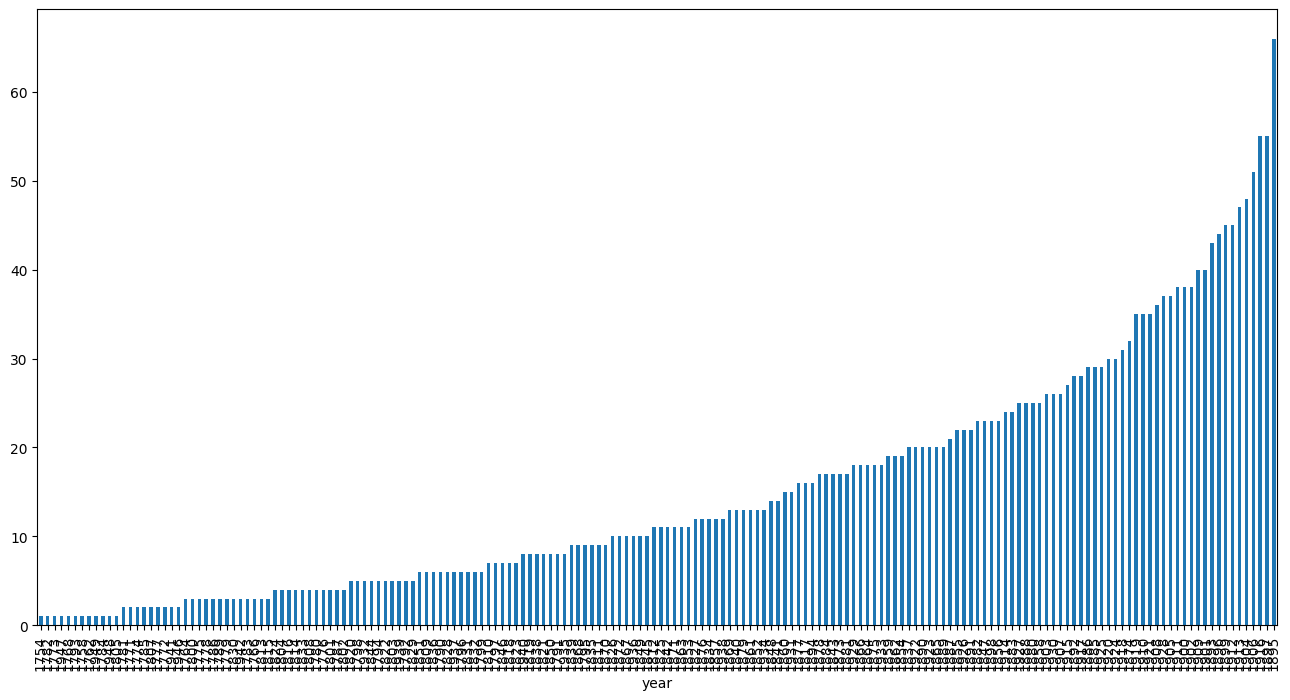

In [58]:
time_filtered.year.value_counts(ascending=True).plot(kind="bar", figsize=(16,8))

In [64]:
time_filtered.shape

(2696, 5)

<Axes: xlabel='lastname'>

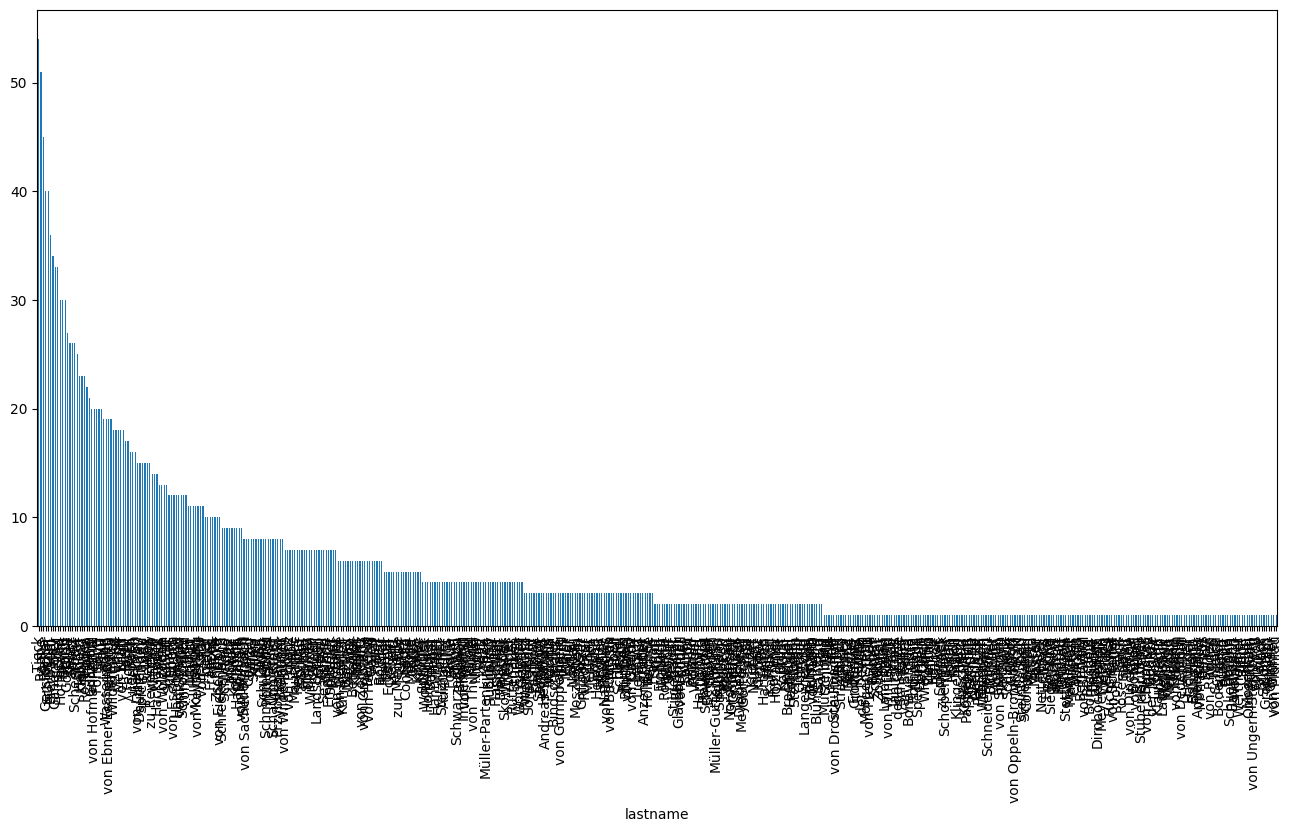

In [71]:
time_filtered.lastname.value_counts().plot(kind="bar", figsize=(16,8))